In [114]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

df = pd.read_csv('Drug_cocktail.csv')
x = df[['CPT', 'CisPt', 'CbPt', 'NCZ', 'MG132', 'Etopo']].values
#x = x[21:,:]
print('Number of instances: ', x.shape[0])
y = df.Viability_Cell_1.values
#y = y[21:]
# To create training and testing instances
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print('Number of Training instances: ', x_train.shape[0])
print('Number of Testing instances: ', x_test.shape[0])

Number of instances:  63
Number of Training instances:  50
Number of Testing instances:  13


In [115]:
import torch
from torch.autograd import Variable

X = Variable(torch.FloatTensor(x_train))
print(X.size())
Y = Variable(torch.FloatTensor(y_train.reshape(-1, 1)))
print(Y.size())

model = torch.nn.Sequential(
    torch.nn.Linear(6, 100),
    torch.nn.LeakyReLU(negative_slope=0.2),
    torch.nn.Linear(100, 100),
    torch.nn.LeakyReLU(negative_slope=0.2),
    torch.nn.Linear(100, 1),
)
loss_fn = torch.nn.MSELoss(reduction="sum")
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for t in range(5000):
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    print(t, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


torch.Size([50, 6])
torch.Size([50, 1])
0 6.820446491241455
1 20.305269241333008
2 4.600212574005127
3 3.205157518386841
4 5.3216233253479
5 5.658071517944336
6 4.527000427246094
7 3.0526680946350098
8 1.9153136014938354
9 1.5573062896728516
10 2.0069334506988525
11 2.377359628677368
12 2.0778183937072754
13 1.4392324686050415
14 0.9588022828102112
15 0.8017919659614563
16 0.8531222343444824
17 0.9322360157966614
18 0.9087950587272644
19 0.7605491280555725
20 0.5634824633598328
21 0.4331723153591156
22 0.4442768692970276
23 0.5496418476104736
24 0.6093204617500305
25 0.5489870309829712
26 0.43115395307540894
27 0.353989839553833
28 0.34780383110046387
29 0.37872061133384705
30 0.40026983618736267
31 0.38893529772758484
32 0.34891459345817566
33 0.3018019199371338
34 0.2722967267036438
35 0.2717454731464386
36 0.2897557318210602
37 0.30249932408332825
38 0.2927742600440979
39 0.2644572854042053
40 0.23649634420871735
41 0.22372618317604065
42 0.22533018887043
43 0.22998686134815216
44 0

485 3.7192471324942744e-14
486 3.4916514124461173e-14
487 3.6914915568786455e-14
488 3.58046925441613e-14
489 4.7351012000262926e-14
490 2.270406085358445e-14
491 2.5590640717609858e-14
492 2.5146551507759796e-14
493 2.3869795029440866e-14
494 3.447242491461111e-14
495 3.785860513971784e-14
496 2.1149748619109232e-14
497 2.375877272697835e-14
498 3.352873534367973e-14
499 3.314015728506092e-14
500 4.374278717023117e-14
501 3.452793606584237e-14
502 3.1807889655510735e-14
503 3.574918139293004e-14
504 4.1799896877137144e-14
505 3.3861802251067274e-14
506 2.5868196473766147e-14
507 2.3148150063434514e-14
508 4.3576253716537394e-14
509 3.5138558729386205e-14
510 2.3869795029440866e-14
511 3.8469227803261674e-14
512 1.6264767310758543e-14
513 2.8033131371785203e-14
514 3.241851231905457e-14
515 3.1585845050585704e-14
516 3.008704396734174e-14
517 3.8469227803261674e-14
518 3.136380044566067e-14
519 2.942091015256665e-14
520 3.452793606584237e-14
521 3.558264793923627e-14
522 3.180788965551

994 2.358668815816145e-13
995 2.8421709430404007e-13
996 1.2956302697375577e-13
997 1.010858063921205e-13
998 2.7516877665334505e-13
999 3.994582442601313e-13
1000 2.1677104555806181e-13
1001 4.4020342926387457e-14
1002 1.9501067427540875e-13
1003 3.0203617384927384e-13
1004 8.071321389024888e-14
1005 1.0286216323152075e-13
1006 2.3764323842101476e-13
1007 8.798517470154366e-14
1008 9.953149415764528e-14
1009 2.614020111479931e-13
1010 1.8773871346411397e-13
1011 7.316369732279782e-14
1012 2.81830114801096e-13
1013 5.760392163267625e-13
1014 6.412648190234904e-13
1015 4.59243754136196e-13
1016 1.3261614029147495e-13
1017 8.842926391139372e-14
1018 4.643507800494717e-13
1019 8.305023335708484e-13
1020 1.0385581283856027e-12
1021 1.0498824032367793e-12
1022 7.581157923652881e-13
1023 4.388156504830931e-13
1024 9.792167077193881e-14
1025 1.0974554598419672e-13
1026 2.6095792193814304e-13
1027 2.8849145294884693e-13
1028 1.428301921180264e-13
1029 4.801714581503802e-14
1030 2.2032375923686

1508 3.0031532816110484e-14
1509 3.1585845050585704e-14
1510 3.608224830031759e-14
1511 3.5083047578154947e-14
1512 2.8033131371785203e-14
1513 3.197442310920451e-14
1514 3.219646771412954e-14
1515 2.914335439641036e-14
1516 2.5757174171303632e-14
1517 2.2648549702353193e-14
1518 2.55351295663786e-14
1519 2.353672812205332e-14
1520 1.7819079545233762e-14
1521 2.19824158875781e-14
1522 2.5979218776228663e-14
1523 2.1371793224034263e-14
1524 2.4313884239290928e-14
1525 3.297362383136715e-14
1526 3.6914915568786455e-14
1527 2.4924506902834764e-14
1528 2.603472992745992e-14
1529 4.0245584642661925e-14
1530 3.980149543281186e-14
1531 2.90878432451791e-14
1532 2.6423307986078726e-14
1533 3.957945082788683e-14
1534 4.3520742565306136e-14
1535 4.313216450668733e-14
1536 3.430589146091734e-14
1537 2.2315482794965646e-14
1538 4.529709940470639e-14
1539 4.3798298321462426e-14
1540 3.5360603334311236e-14
1541 2.781108676686017e-14
1542 2.403632848313464e-14
1543 4.363176486776865e-14
1544 2.914335

2025 4.4586556668946287e-13
2026 1.4421797089880783e-13
2027 5.553890680687346e-13
2028 2.423061751244404e-13
2029 4.100053629940703e-13
2030 5.554445792199658e-13
2031 7.421840919619171e-14
2032 3.619882171790323e-13
2033 1.9562129693895258e-13
2034 2.000621890374532e-13
2035 7.099321130965563e-13
2036 2.975952817507732e-13
2037 2.3475665855698935e-13
2038 6.865619184281968e-13
2039 3.0164759579065503e-13
2040 2.2959412149248237e-13
2041 1.921796055626146e-13
2042 1.3195000647669985e-13
2043 1.7857937351095643e-13
2044 1.7930101847696278e-13
2045 6.519784712111232e-13
2046 1.4771517342637708e-13
2047 1.6969758931395518e-13
2048 1.9212409441138334e-13
2049 7.249756350802272e-14
2050 2.7738922270259536e-13
2051 1.1063372440389685e-13
2052 1.6547874182037958e-13
2053 1.1152190282359697e-13
2054 1.010858063921205e-13
2055 5.445643935786393e-14
2056 1.33060229501325e-13
2057 4.474198789239381e-14
2058 1.4171996909340123e-13
2059 8.354428260304303e-14
2060 6.161737786669619e-14
2061 1.37945

2543 9.81992265280951e-14
2544 8.953948693601887e-14
2545 2.473576898864849e-13
2546 2.0966561820046081e-13
2547 8.26561041833429e-14
2548 4.45032899420994e-13
2549 5.778155731661627e-13
2550 8.331668688299487e-13
2551 1.0625944568687373e-12
2552 2.427946732552755e-12
2553 8.75549632795014e-12
2554 3.3070990390626775e-11
2555 1.3370510254517853e-10
2556 5.471474384677322e-10
2557 2.224654904736667e-09
2558 9.034200942892312e-09
2559 3.677788740219512e-08
2560 1.499150386052861e-07
2561 6.121211413301353e-07
2562 2.5044853373401565e-06
2563 1.0284125892212614e-05
2564 4.230472768540494e-05
2565 0.00017497620137874037
2566 0.000723515113350004
2567 0.0030521999578922987
2568 0.012675573118031025
2569 0.05646137893199921
2570 0.20234617590904236
2571 0.7366368770599365
2572 0.30868270993232727
2573 0.047129224985837936
2574 0.23721535503864288
2575 0.06812417507171631
2576 0.21612922847270966
2577 0.12411126494407654
2578 0.1446821242570877
2579 0.08615392446517944
2580 0.0795817226171493

3059 2.531308496145357e-14
3060 2.6478819137309983e-14
3061 3.047562202596055e-14
3062 3.108624468950438e-14
3063 4.085620730620576e-14
3064 3.8691272408186705e-14
3065 2.736699755701011e-14
3066 4.624078897563777e-14
3067 4.068967385251199e-14
3068 3.5138558729386205e-14
3069 3.1807889655510735e-14
3070 5.956346527113965e-14
3071 5.156985949383852e-14
3072 2.1760371282653068e-14
3073 3.58046925441613e-14
3074 5.2513549064769904e-14
3075 4.823919041996305e-14
3076 2.5590640717609858e-14
3077 4.446443213623752e-14
3078 3.297362383136715e-14
3079 2.936539900133539e-14
3080 2.070565940925917e-14
3081 3.141931159689193e-14
3082 4.268807529683727e-14
3083 6.200595592531499e-14
3084 6.378231276471524e-14
3085 4.3076653355456074e-14
3086 4.007905118896815e-14
3087 5.934142066621462e-14
3088 2.403632848313464e-14
3089 4.1799896877137144e-14
3090 5.828670879282072e-14
3091 2.4424906541753444e-14
3092 2.270406085358445e-14
3093 2.886579864025407e-14
3094 4.29101199017623e-14
3095 3.7303493627405

3569 2.2359891715950653e-13
3570 7.541189894766376e-13
3571 2.773337115513641e-13
3572 1.6547874182037958e-13
3573 6.208922265216188e-13
3574 1.6525669721545455e-13
3575 1.279532035880493e-13
3576 2.194355808171622e-13
3577 1.1818324097134791e-13
3578 3.568256801145253e-13
3579 1.6436851879575443e-13
3580 1.7119639039719914e-13
3581 1.5726309143815342e-13
3582 9.803269307440132e-14
3583 1.4854784069484595e-13
3584 1.113553693699032e-13
3585 3.3556490919295356e-13
3586 1.705857677336553e-13
3587 1.7991164114050662e-13
3588 2.840505608503463e-13
3589 1.0791367799356522e-13
3590 3.586575481051568e-13
3591 1.8368639942423215e-13
3592 1.6614487563515468e-13
3593 4.294897770762418e-13
3594 1.6897594434794883e-13
3595 1.8146595337498184e-13
3596 2.0411450307733503e-13
3597 1.0841327835464654e-13
3598 2.223221606811876e-13
3599 1.099120794378905e-13
3600 1.9101387138675818e-13
3601 1.11743947428522e-13
3602 2.6539881403664367e-13
3603 1.3417045252595017e-13
3604 1.5143442055887135e-13
3605 1.8

4087 0.00011980113049503416
4088 0.0013698898255825043
4089 0.0008636516286060214
4090 4.9710142775438726e-05
4091 0.0009757350198924541
4092 0.0007440255722030997
4093 2.4529441361664794e-05
4094 0.0006951449322514236
4095 0.0005958281108178198
4096 1.103307386074448e-05
4097 0.0005061057745479047
4098 0.0004776506102643907
4099 1.2496341696532909e-05
4100 0.0003587838145904243
4101 0.00037452884134836495
4102 9.190589480567724e-06
4103 0.00025690204347483814
4104 0.0002946124295704067
4105 8.746485036681406e-06
4106 0.00018116382125299424
4107 0.0002266065130243078
4108 1.1162568625877611e-05
4109 0.00012475455878302455
4110 0.00017475729691796005
4111 1.1099451512563974e-05
4112 8.43713860376738e-05
4113 0.00013430971011985093
4114 1.0508804734854493e-05
4115 5.7270390243502334e-05
4116 0.00010110368020832539
4117 1.1232121323700994e-05
4118 3.661544542410411e-05
4119 7.6517098932527e-05
4120 1.148678256868152e-05
4121 2.242175287392456e-05
4122 5.727587267756462e-05
4123 1.07466748

4604 1.9462209621678994e-13
4605 1.5509815654013437e-13
4606 5.784261958297066e-14
4607 1.2356782264077992e-13
4608 1.446620601086579e-13
4609 1.0552669849062113e-13
4610 1.172950625516478e-13
4611 1.372790769949006e-13
4612 8.604228440844963e-14
4613 1.2506662372402388e-13
4614 1.570410468332284e-13
4615 7.538414337204813e-14
4616 9.997558336749535e-14
4617 9.836575998178887e-14
4618 6.59472476627343e-14
4619 1.5060175329040248e-13
4620 8.770761894538737e-14
4621 9.536815781530095e-14
4622 1.2367884494324244e-13
4623 7.799316747991725e-14
4624 2.610134330893743e-13
4625 1.534883331544279e-13
4626 6.866729407306593e-14
4627 1.9972912213006566e-13
4628 9.00390872971002e-14
4629 1.5970558209232877e-13
4630 2.8382851624542127e-13
4631 1.5659695762337833e-13
4632 1.0691447727140257e-13
4633 2.920996777788787e-13
4634 1.5526468999382814e-13
4635 1.1601830607332886e-13
4636 2.1438406605511773e-13
4637 1.673106098110111e-13
4638 1.7569279364693102e-13
4639 5.823119764158946e-14
4640 1.4149792

In [116]:
y_test_pred = model(Variable(torch.FloatTensor([x_test])))
prediction = y_test_pred.data.numpy().reshape(1, -1)[0]


In [117]:
from sklearn.metrics import r2_score
print('R2-value for MLP: ',r2_score(prediction , y_test))

R2-value for MLP:  0.4186808335498824


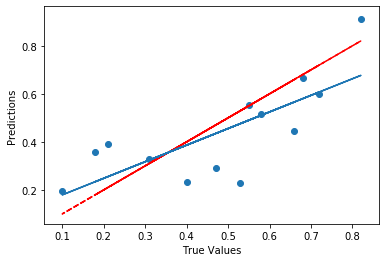

In [118]:
from numpy.polynomial.polynomial import polyfit
plt.plot(y_test, y_test, 'r--')
b, m = polyfit(y_test, prediction, 1)
plt.plot(y_test, b + (m * np.array(y_test)), '-')
plt.scatter(y_test, prediction)
plt.xlabel("True Values")
plt.ylabel('Predictions')
plt.show()

In [119]:
import numpy as np
drugs = ['CPT', 'CisPt', 'CbPt', 'NCZ', 'MG132', 'Etopo']
g_pairs=[[0, 0.67, 0.58, 0.66, 0.66, 0.51],
         [0.67, 0, 0.73, 0.72, 0.74, 0.68],
         [0.58, 0.73, 0, 0.41, 0.58, 0.64],
         [0.66, 0.72, 0.41, 0, 0.47, 0.78],
         [0.66, 0.74, 0.58, 0.47, 0, 0.72],
         [0.51, 0.68, 0.64, 0.78, 0.72, 0]]

def find_index_one(x):
    arr = []
    for i in range(len(x)):
        if x[i] == 1:
            arr.append(i)
    return arr


check_index = []
check_sum = []
comb_indices = []
true_value = []
for i, x in enumerate(x_test):
    if np.sum(x) > 2:
        check_index.append(i)
        check_sum.append(np.sum(x))
        comb_indices.append(find_index_one(x))
        true_value.append(y_test[i])

from itertools import combinations 

predictions = []

for i in range(len(comb_indices)):
    l = list(combinations(comb_indices[i], 2))
    prod = 1
    for j in range(len(l)):
        x_i, y_i = l[j]
        prod *= g_pairs[x_i][y_i]
    predictions.append(prod**(1/(check_sum[i]-1)))

print('R2-value for Pairs Models: ',r2_score(predictions , true_value))
print('Comparison with MLP: ', r2_score(prediction[check_index] , true_value))

# from numpy.polynomial.polynomial import polyfit
# b, m = polyfit(true_value, predictions, 1)
# print(b, m)

# b1, m1 = polyfit(true_value, prediction[check_index], 1)
# print(b1, m1)

# plt.plot(true_value, true_value, 'r--')
# plt.scatter(true_value, predictions, marker='*')
# plt.plot(true_value, b + (m * np.array(true_value)), '-')
# plt.scatter(true_value, prediction[check_index], marker='+')
# plt.plot(true_value, b1 + (m1 * np.array(true_value)), '-')
# plt.xlabel("True Values")
# plt.ylabel('Predictions')
# plt.show()




R2-value for Pairs Models:  -5.80312853223809
Comparison with MLP:  -0.31253532121091143


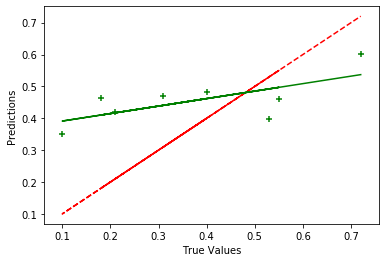

In [120]:
from numpy.polynomial.polynomial import polyfit
plt.plot(true_value, true_value, 'r--')
b, m = polyfit(true_value, predictions, 1)
plt.plot(true_value, b + (m * np.array(true_value)), 'g-')
plt.scatter(true_value, predictions, c='g', marker='+')
plt.xlabel("True Values")
plt.ylabel('Predictions')
plt.show()

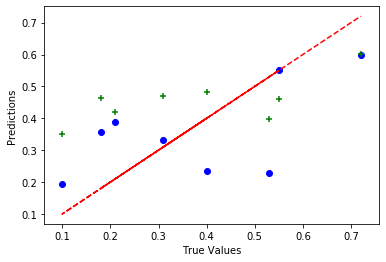

In [121]:
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(true_value, predictions, 1)

b1, m1 = polyfit(true_value, prediction[check_index], 1)

plt.plot(true_value, true_value, 'r--')

plt.scatter(true_value, prediction[check_index], c='b',marker='o')
#plt.plot(true_value, b1 + (m1 * np.array(true_value)), '-')

plt.scatter(true_value, predictions, c='g', marker='+')
#plt.plot(true_value, b + (m * np.array(true_value)), '-')

plt.xlabel("True Values")
plt.ylabel('Predictions')
plt.show()